In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import librosa as lr

from pathlib import PurePath
from IPython import display
from tqdm import tqdm
import pickle

import vxs
import vxs.utils as vxsu

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



In [2]:
ENST_drums = vxs.ENSTDrumsTrackSet('../data/ENST-drums-public', audio_type='kick')

In [3]:
track, anno = ENST_drums.get(2)

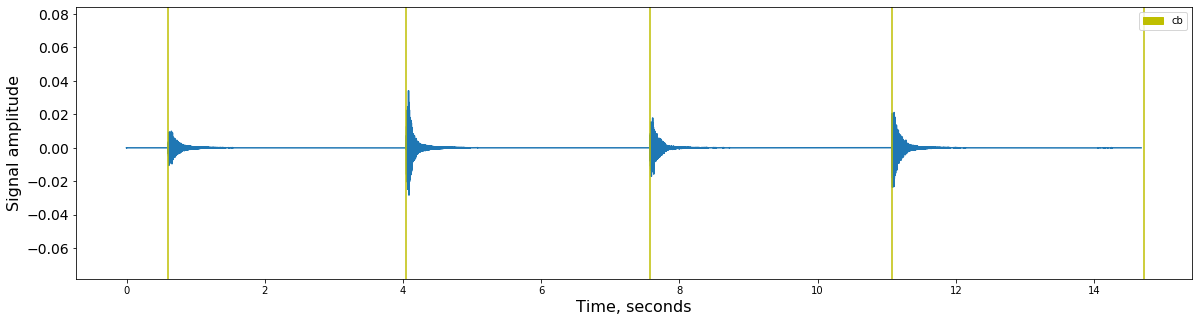

In [4]:
vxsu.plot_track(track, onsets=anno, color_events=True)

In [5]:
vxsu.play_audio(track)

/home/flyingleafe/vxs-vpt/pythonenv/lib/python3.6/site-packages/IPython/lib/display.py:173: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.



(128, 1265)


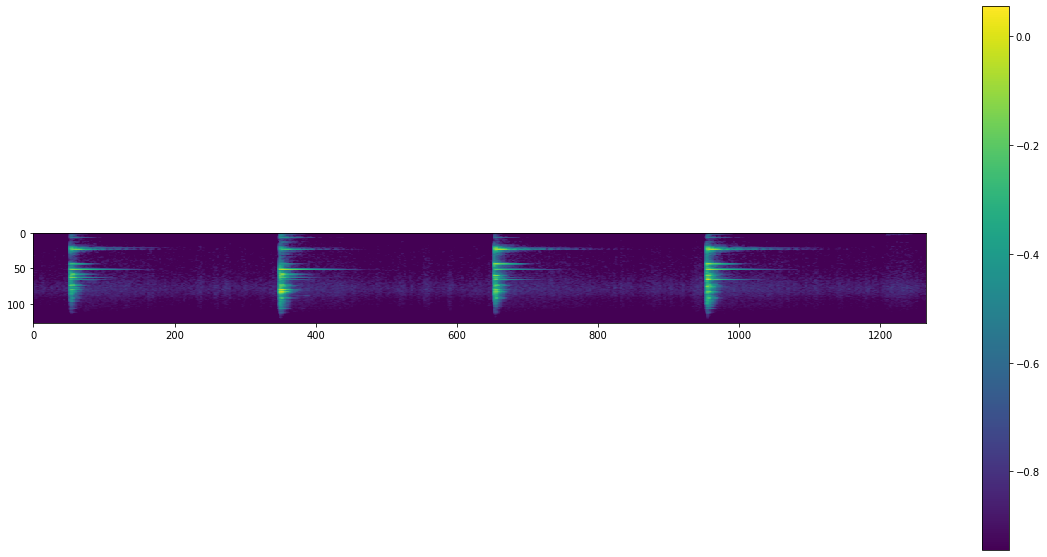

In [16]:
sgram = vxs.bark_specgram(track)
print(sgram.shape)
fig = plt.figure(figsize=(20, 10))
im = plt.imshow(sgram)
plt.colorbar(im)

(128, 1265)


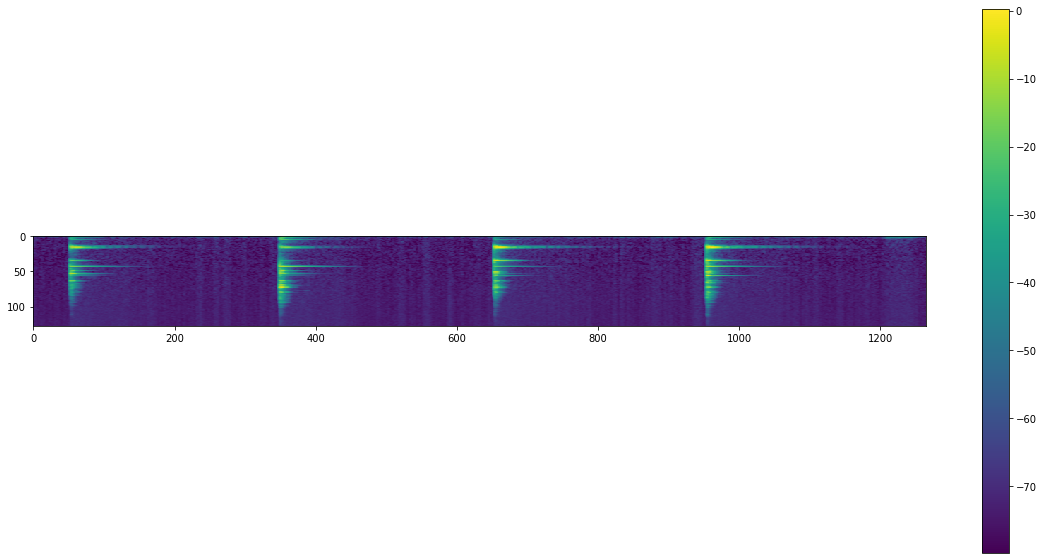

In [23]:
sgram = vxs.mel_specgram(track)
print(sgram.shape)
fig = plt.figure(figsize=(20, 10))
im = plt.imshow(sgram)
plt.colorbar(im)

In [47]:
track_segm = track.segment_frames(int(anno['time'][0]*44100), 4096)

In [50]:
feats = vxs.ramires_features(track_segm)

In [51]:
feats.shape

(54, 1)

In [26]:
anno_classes = set()
for track, anno in tqdm(ENST_drums.annotated_tracks()):
    anno_classes = anno_classes.union(set(list(np.unique(anno['class']))))
    
anno_classes

318it [03:04,  1.73it/s]


{'bd',
 'c1',
 'c4',
 'cb',
 'ch1',
 'ch5',
 'chh',
 'cr1',
 'cr2',
 'cr5',
 'cs',
 'lft',
 'lmt',
 'lt',
 'ltr',
 'mt',
 'mtr',
 'ohh',
 'rc2',
 'rc3',
 'rc4',
 'rs',
 'sd',
 'sd-',
 'spl2',
 'sticks',
 'sweep'}